# Predicting the Median Income for Housing Tracts:
### In this project, we will be using various attributes from a housing tract dataset to predict values for our target variable, which is the median income.

In [1]:
# importing 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## We first begin by uploading the housing.csv dataset:

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving housing.csv to housing.csv


In [3]:
# Define the dataset as 'housing_df'
housing_df = pd.read_csv("housing.csv")

In [4]:
# Display first 5 rows of the dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.index

RangeIndex(start=0, stop=20640, step=1)

In [6]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
housing_df.values

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [8]:
housing_df.shape

(20640, 10)

## Data Pre-Processing/Cleaning Step:

In [9]:
# The ocean_proximity column is renamed to min_hours_from_coast so we can later change the objects to integers
housing_df.rename(columns = {'ocean_proximity' : 'min_hours_from_coast'}, inplace=True)

In [10]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'min_hours_from_coast'],
      dtype='object')

In [11]:
housing_df.dtypes

longitude               float64
latitude                float64
housing_median_age      float64
total_rooms             float64
total_bedrooms          float64
population              float64
households              float64
median_income           float64
median_house_value      float64
min_hours_from_coast     object
dtype: object

In [12]:
# Impute the minimum number of hours that each housing tract is from the coast
housing_df = housing_df.replace(to_replace = 'NEAR OCEAN', value = 0)
housing_df = housing_df.replace(to_replace = 'NEAR BAY', value = 0)
housing_df = housing_df.replace(to_replace = '<1H OCEAN', value = 0)
housing_df = housing_df.replace(to_replace = 'ISLAND', value = 0)
housing_df = housing_df.replace(to_replace = 'INLAND', value = 1)

In [13]:
housing_df.dtypes

longitude               float64
latitude                float64
housing_median_age      float64
total_rooms             float64
total_bedrooms          float64
population              float64
households              float64
median_income           float64
median_house_value      float64
min_hours_from_coast      int64
dtype: object

In [14]:
# As specified, the values for median_income need to be multiplied by $10,000
housing_df['median_income'] = housing_df['median_income'].multiply(10000, axis='index')

In [15]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,min_hours_from_coast
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,0


In [16]:
# Number of missing/null values for each feature
housing_df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
min_hours_from_coast      0
dtype: int64

In [17]:
housing_df.isnull().sum(axis=1).sum()

207

### Visualizations of Missing Values:

In [18]:
import missingno as msno

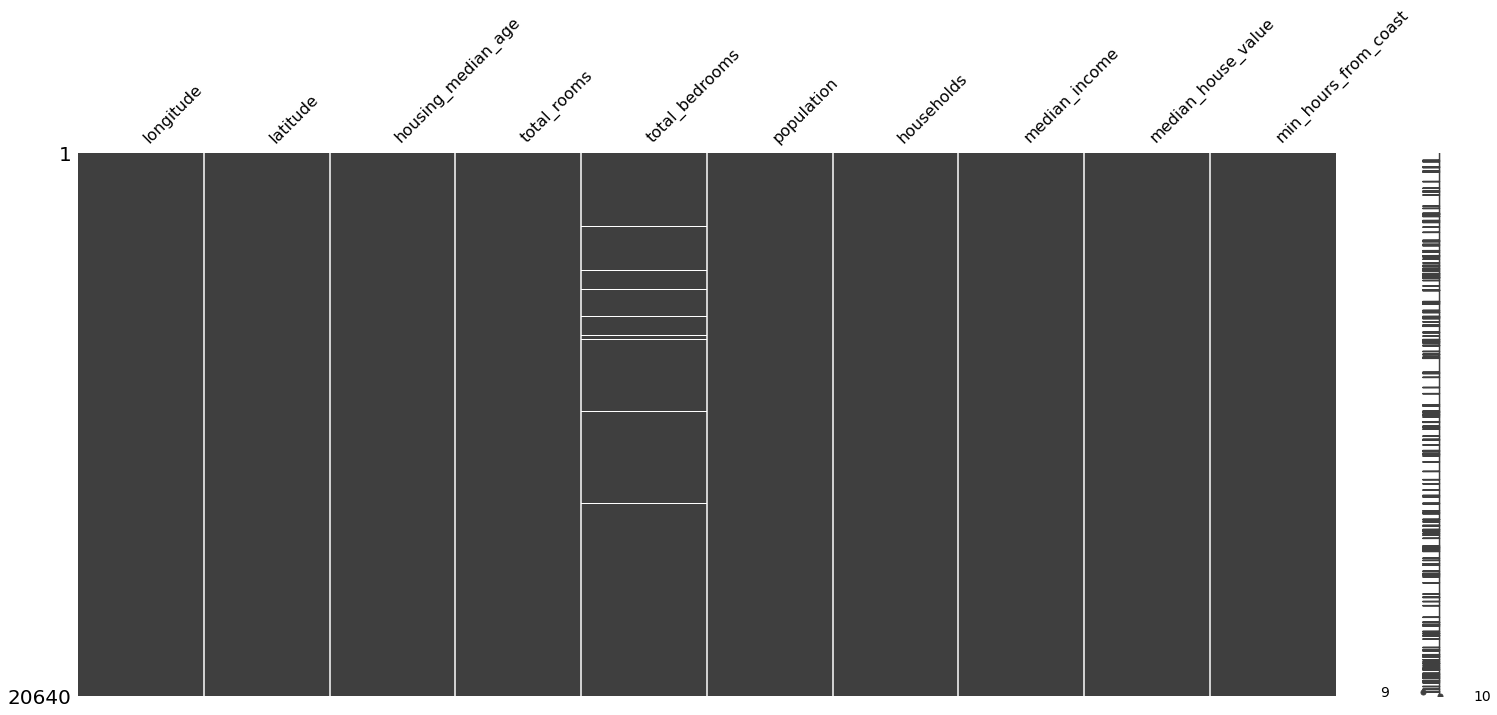

In [19]:
# Visualize missing values as a matrix 
msno.matrix(housing_df)

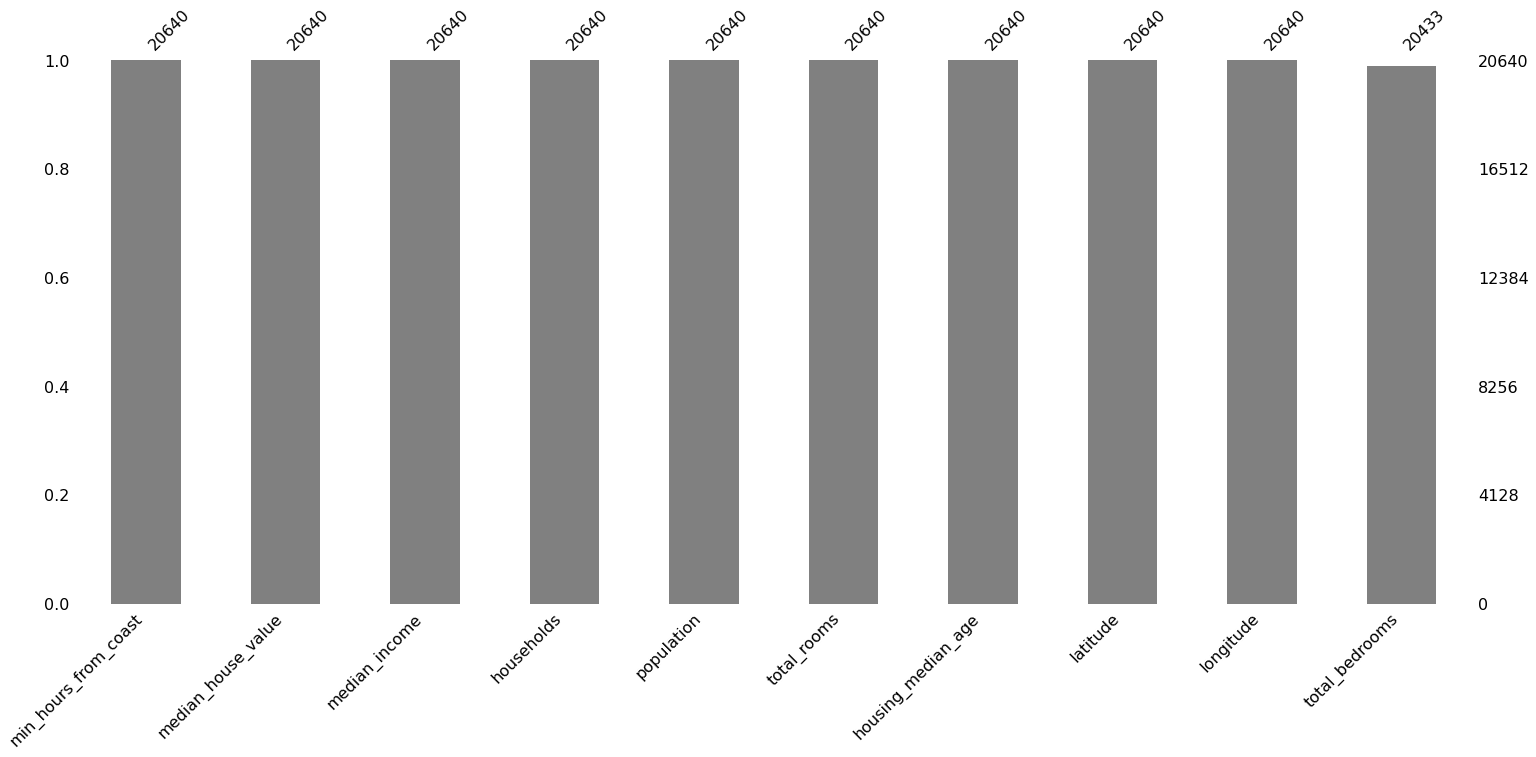

In [20]:
msno.bar(housing_df, color = 'gray', sort = 'descending')

#### To deal with missing values, we will calculate the mean of total_bedrooms and impute that for each missing value in the column:

In [21]:
mean = housing_df.total_bedrooms.mean()
print(mean)

537.8705525375618


In [22]:
housing_df['total_bedrooms'] = np.round(housing_df.total_bedrooms.fillna(mean))

In [23]:
housing_df.head(1353)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,min_hours_from_coast
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
1348,-121.93,38.01,9.0,2294.0,389.0,1142.0,365.0,53363.0,160800.0,1
1349,-121.93,38.02,13.0,1524.0,286.0,940.0,308.0,51337.0,154800.0,1
1350,-121.95,38.03,5.0,5526.0,538.0,3207.0,1012.0,40767.0,143100.0,1
1351,-121.94,38.03,27.0,1654.0,478.0,1141.0,420.0,14871.0,87100.0,1


## Histograms visualizing the frequencies for median house value & median income:

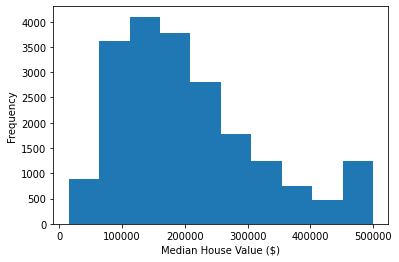

In [24]:
housing_df['median_house_value'].plot(kind='hist')
plt.xlabel('Median House Value ($)');

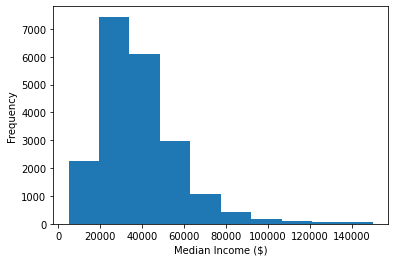

In [25]:
housing_df['median_income'].plot(kind='hist')
plt.xlabel('Median Income ($)');

## Values for median income, median house value, and median age are grouped by min_hours_from_coast:

In [26]:
housing_df.groupby('min_hours_from_coast').aggregate({'median_income': 'median',
                               'median_house_value': 'median',
                               'housing_median_age': 'median'})

,median_income,median_house_value,housing_median_age
min_hours_from_coast,,,
0,38158.0,219500.0,32.0
1,29877.0,108500.0,23.0


## SKLEARN Regression Modeling

In [27]:
# Select X and y
X = housing_df.drop(['median_income'], axis=1)
y = housing_df.median_income

In [28]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=321)


In [30]:
# Build a multiple regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [31]:
# Fit model
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions using X_test data
y_pred = linreg.predict(X_test)

In [33]:
# Create DF for results of predicted, actual, and the residual error
housing_df_results = pd.DataFrame( {
    'Predicted': y_pred,
    'Actual': y_test,
    'Residual': y_test - y_pred
})

In [34]:
housing_df_results.head(20)

,Predicted,Actual,Residual
1111,30195.883596,25670.0,-4525.883596
14028,30310.915647,24650.0,-5660.915647
986,56961.431890,103203.0,46241.568110
1395,25511.394952,40154.0,14642.605048
10187,23694.926489,20227.0,-3467.926489
972,86888.287484,74353.0,-12535.287484
4736,48748.197944,42404.0,-6344.197944
18973,39612.265854,54074.0,14461.734146
15220,49220.337038,54584.0,5363.662962
13328,29522.525829,36250.0,6727.474171


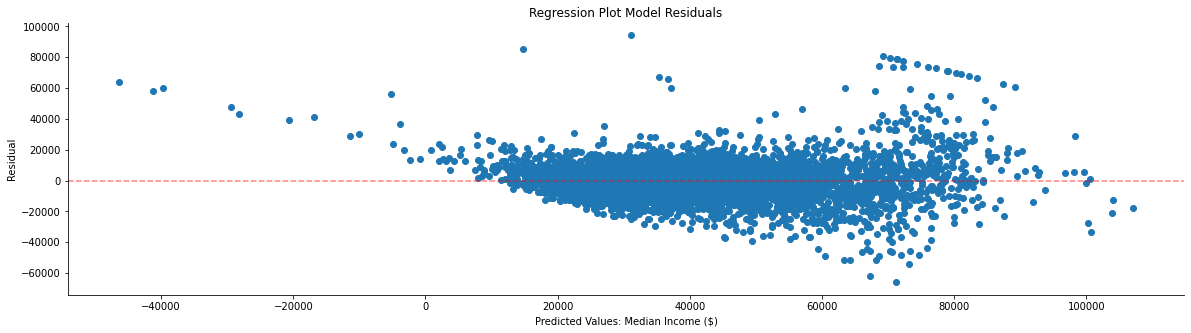

In [35]:
# Visualize the residuals
plt.figure(figsize=(20,5))
plt.scatter(housing_df_results.Predicted, housing_df_results.Residual)
plt.axhline(y=0.0, color='red', linestyle='--', alpha=0.5)
plt.title("Regression Plot Model Residuals")
plt.xlabel("Predicted Values: Median Income ($)")
plt.ylabel("Residual")

sns.despine(top=True, right=True)

In [36]:
from sklearn import metrics
print("R2: ", metrics.r2_score(y_test, y_pred))

R2:  0.650946130963617


In [37]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred).round(2)))

MSE:  127417530.79
RMSE:  11287.937401934863
